## Introduction to Machine Learning with Python - part2
#### Scikit-learn을 중심으로 ML 관련 내용을 정리하였습니다. 파이썬 라이브러리를 활용한 머신러닝(번역개정2판, 안드레아스 뮐러, 세라 가이도 지음)을 참고하였습니다.

## 3. 비지도 학습과 데이터 전처리
### 3.1 비지도 학습의 종류
#### 비지도 변환 : 데이터를 새롭게 표현하여 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘 ex. 차원축소
#### 군집 알고리즘 : 비슷한 데이터를 그룹화

### 3.2 비지도 학습의 도전 과제 
#### 비지도 학습에서 가장 어려운 일은 학습 결과를 평가하는 과정 / 비지도 학습 알고리즘은 데이터 이해를 위한 EDA 과정에서 활용 / 지도학습의 전처리 단계에서도 활용

### 3.3 데이터 전처리와 스케일 조정

In [1]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
#### matplotlib 한글 세팅
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import sklearn

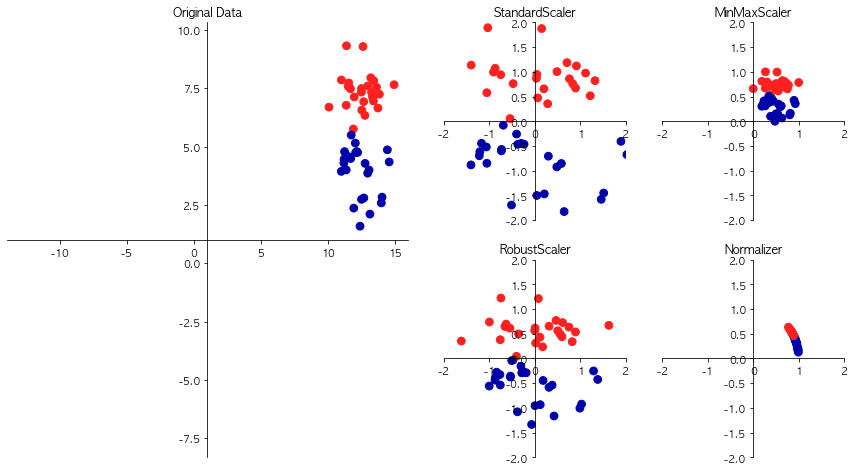

In [2]:
mglearn.plots.plot_scaling()

#### 3.3.1 여러 가지 전처리 방법
#### Standard scaler : 특성의 평균을 0, 분산을 1로 변경 / 특성의 최대값, 최소값 크기를 제한하지는 않음
#### Robust Scaler : 특성들이 같은 스케일을 가짐 / 평균대신 중간 값, 분산대신 사분위 값 활용 / outlier에 영향을 받지 않음
#### Minmax Scaler : 모든 특성이 0과 1 사이에 위치하도록 변경
#### Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 조정 / 지름이 1인 원에 데이터 포인트를 투영 / 특성 벡터의 길이는 상관 없고 데이터 방향만이 중요할 때 활용

#### 3.3.2 데이터 변환 적용하기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
print("변환된 후 크기 : ", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값 : \n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값 : \n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값 : \n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 : \n", X_train_scaled.max(axis=0))

X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값 : \n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 : \n", X_test_scaled.max(axis=0))


변환된 후 크기 :  (426, 30)
스케일 조정 전 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
스케일 조정 후 특성별 최소값 : 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  

#### 3.3.3 Quantile Transformer와 PowerTransformer
#### Quantile Transformer : 1000개의 분위를 사용하여 데이터를 균등하게 분포 / 이상치에 민감하지 않음 / 전체 데이터를 0과 1사이로 압축
#### PowerTransformer : 데이터의 특성별로 정규분포 형태에 가깝도록 변환 / yeo-johnson, box-cox 알고리즘 지정 가능

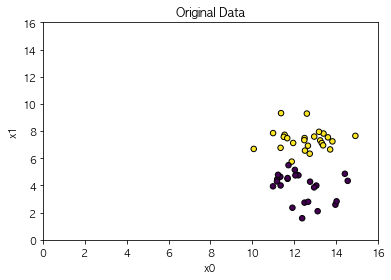

In [12]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,16)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

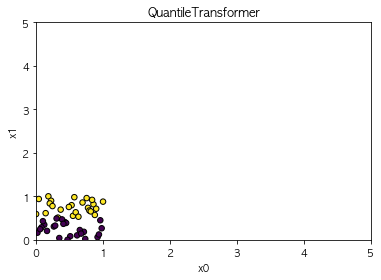

In [20]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

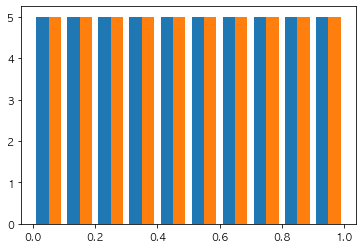

In [14]:
plt.hist(X_trans)
plt.show()

In [17]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

X_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(X_trans[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]
[0.   0.25 0.5  0.75 1.  ]


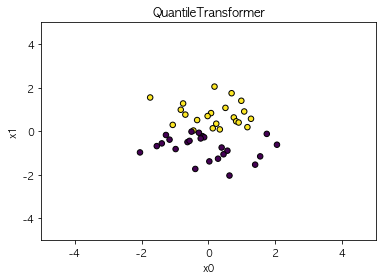

In [19]:
scaler = QuantileTransformer(output_distribution= 'normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

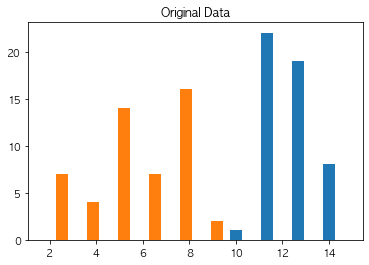

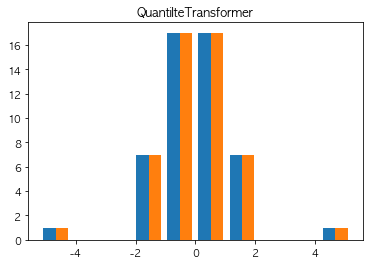

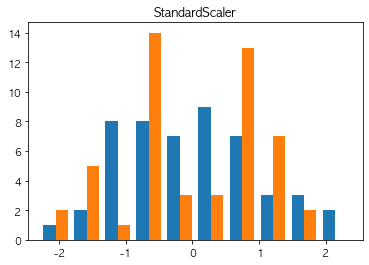

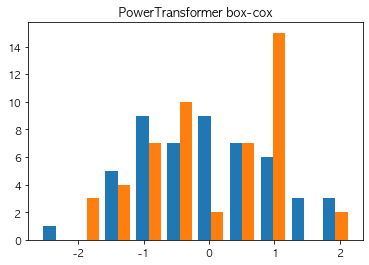

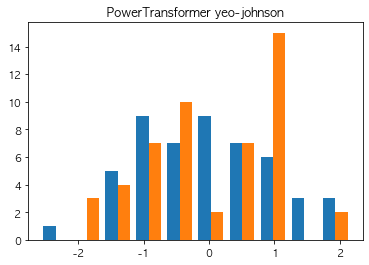

In [21]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title('QuantilteTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

#### 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

Text(0.5, 1.0, 'bad scaler data')

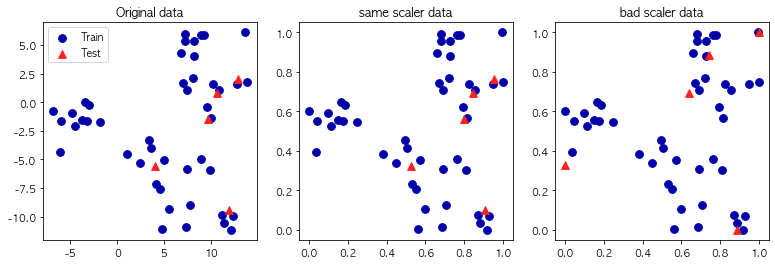

In [25]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize = (13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c = mglearn.cm2.colors[0], label = 'Train', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = 'Test', s=60)
axes[0].legend(loc = 'upper left')
axes[0].set_title('Original data')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2.colors[0], label = 'Train', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = 'Test', s=60)
axes[1].set_title('same scaler data')

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_badly_scaled = test_scaler.transform(X_test)
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2.colors[0], label = 'Train', s=60)
axes[2].scatter(X_test_badly_scaled[:, 0], X_test_badly_scaled[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = 'Test', s=60)
axes[2].set_title('bad scaler data')


#### 3.3.5 지도 학습에서 데이터 전처리 효과

In [27]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.3f}".format(svm.score(X_test, y_test)))

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('스케일 조정된 테스트 세트의 정확도 : {:.3f}'.format(svm.score(X_test_scaled, y_test)))

테스트 세트 정확도 : 0.629
스케일 조정된 테스트 세트의 정확도 : 0.951


### 3.4 차원 축소, 특성 추출, 매니폴드 학습
#### 3.4.1 주성분분석(PCA)
#### 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술 / 차원 축소 용도로 사용 가능

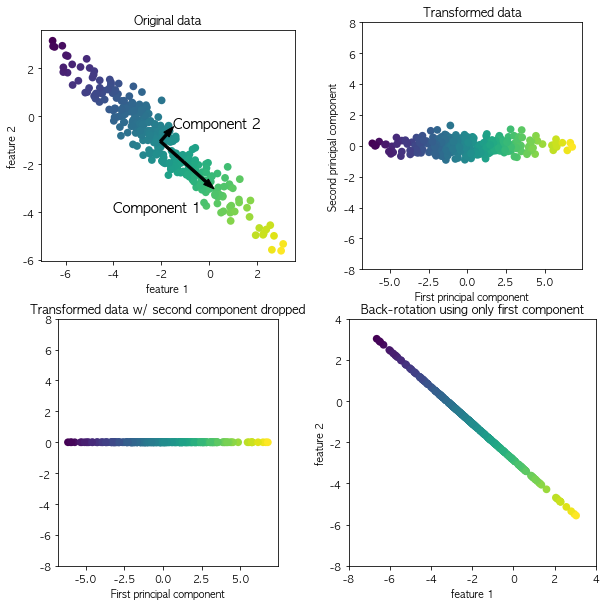

In [28]:
mglearn.plots.plot_pca_illustration()

원본 데이터 형태 :  (569, 30)
축소된 데이터 형태 :  (569, 2)


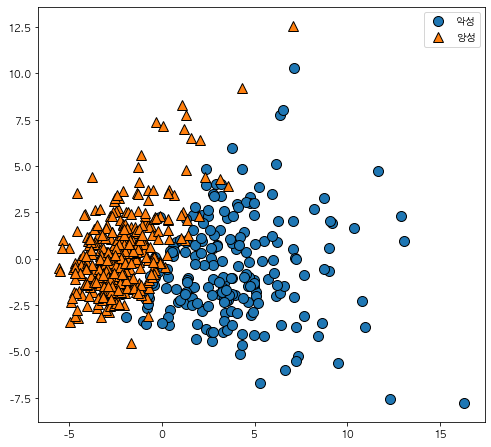

In [31]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print('원본 데이터 형태 : ', str(X_scaled.shape))
print('축소된 데이터 형태 : ', str(X_pca.shape))

plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc = 'best')
plt.gca().set_aspect('equal')

In [32]:
print('PCA 주성분 형태 : ', pca.components_.shape)
print('PCA 주성분 : ', pca.components_)

PCA 주성분 형태 :  (2, 30)
PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


([<matplotlib.axis.XTick at 0x7fcb18934a58>,
 [Text(0, 1, 'mean radius'),
  Text(1, 1, 'mean texture'),
  Text(2, 1, 'mean perimeter'),
  Text(3, 1, 'mean area'),
  Text(4, 1, 'mean smoothness'),
  Text(5, 1, 'mean compactness'),
  Text(6, 1, 'mean concavity'),
  Text(7, 1, 'mean concave points'),
  Text(8, 1, 'mean symmetry'),
  Text(9, 1, 'mean fractal dimension'),
  Text(10, 1, 'radius error'),
  Text(11, 1, 'texture error'),
  Text(12, 1, 'perimeter error'),
  Text(13, 1, 'area error'),
  Text(14, 1, 'smoothness error'),
  Text(15, 1, 'compactness error'),
  Text(16, 1, 'concavity error'),
  Text(17, 1, 'concave points error'),
  Text(18, 1, 'symmetry error'),
  Text(19, 1, 'fractal dimension error'),
  Text(20, 1, 'worst radius'),
  Text(21, 1, 'worst texture'),
  Text(22, 1, 'worst perimeter'),
  Text(23, 1, 'worst area'),
  Text(24, 1, 'worst smoothness'),
  Text(25, 1, 'worst compactness'),
  Text(26, 1, 'worst concavity'),
  Text(27, 1, 'worst concave points'),
  Text(28, 1, '

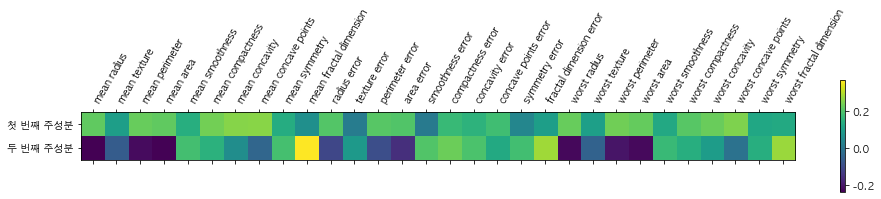

In [33]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha = 'left')

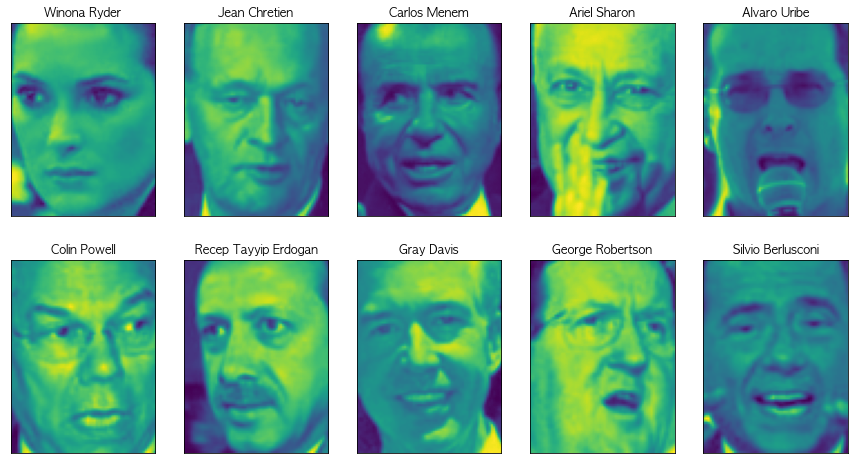

In [36]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize =(15, 8), subplot_kw={'xticks' : (), 'yticks' : ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [37]:
mask = np.zeros(people.target.shape, dtype = bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('1-최근접 이웃의 테스트 세트 점수 : {:.2f}'.format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수 : 0.23


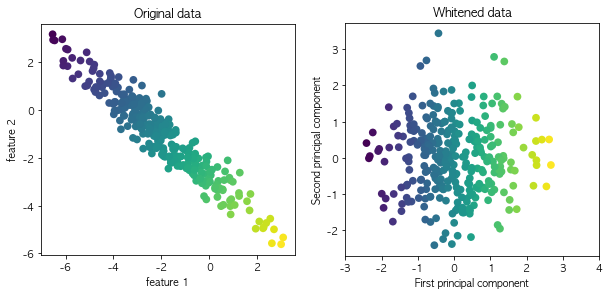

In [41]:
mglearn.plots.plot_pca_whitening()

In [43]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape : ', X_train_pca.shape)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('1-최근접 이웃의 테스트 세트 점수 : {:.2f}'.format(knn.score(X_test_pca, y_test)))

X_train_pca.shape :  (1547, 100)
1-최근접 이웃의 테스트 세트 점수 : 0.31


pca.components_.shape:  (100, 5655)


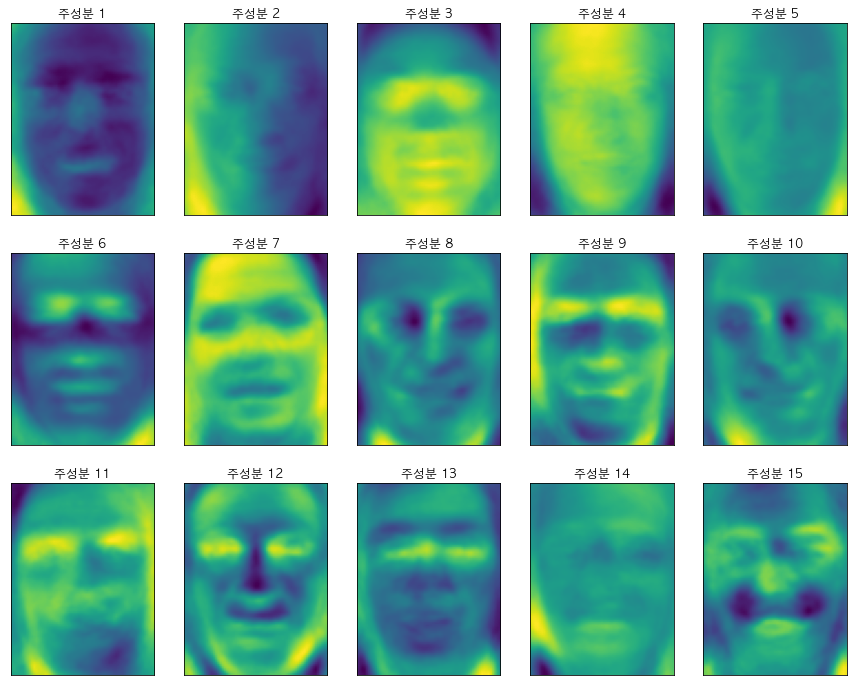

In [45]:
print('pca.components_.shape: ', pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize = (15,12), subplot_kw={'xticks' : (), 'yticks' : ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분 {}'.format((i+1)))

#### 3.4.2 비음수 행렬 분해(NMF)
#### NMF : PCA와 유사 / 차원 축소에 활용 가능 / 음수가 아닌 성분과 계수 값을 찾음 (주성분과 계수가 모두 0보다 크거나 같음) / 음수가 아닌 데이터에만 적용 가능 / 데이터를 인코딩하거나 재구성하는 용도가 아닌 데이터에 있는 유용한 패턴을 찾을 때 활용

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: Convergenc

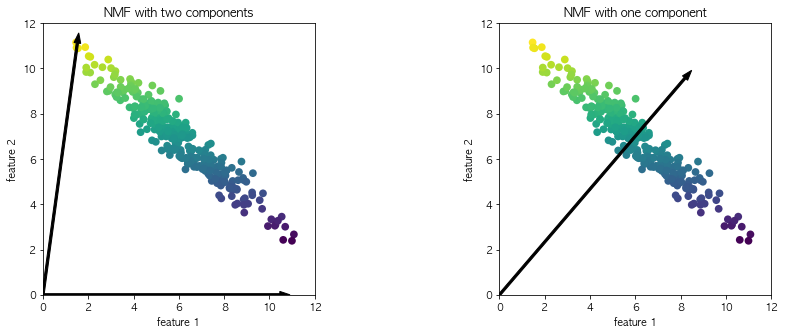

In [48]:
mglearn.plots.plot_nmf_illustration()

In [49]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.117647, ..., 0.613072]], dtype=float32))


/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: Convergenc

KeyboardInterrupt: 

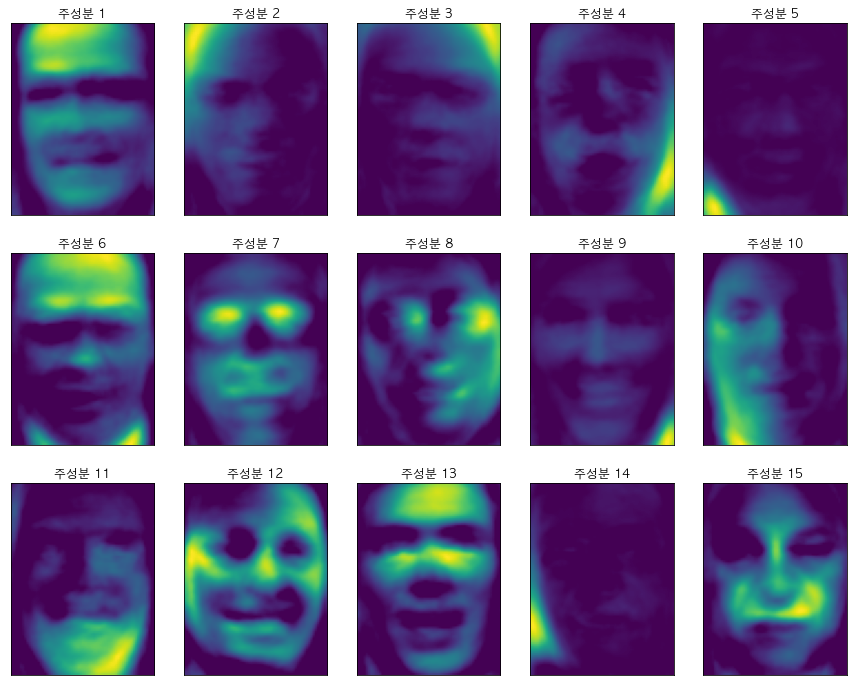

In [50]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw ={'xticks' : (), 'yticks' : ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분 {}'.format((i+1)))

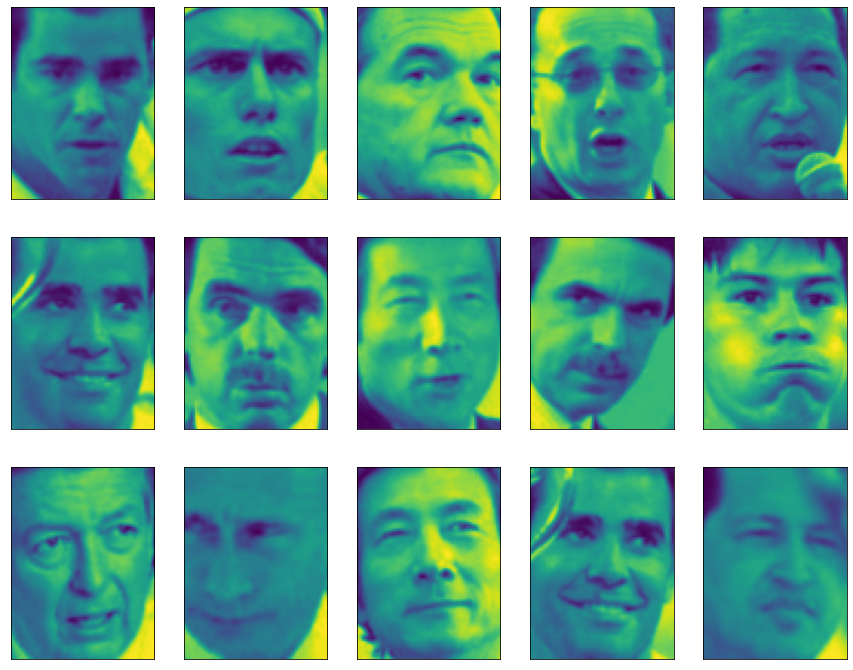

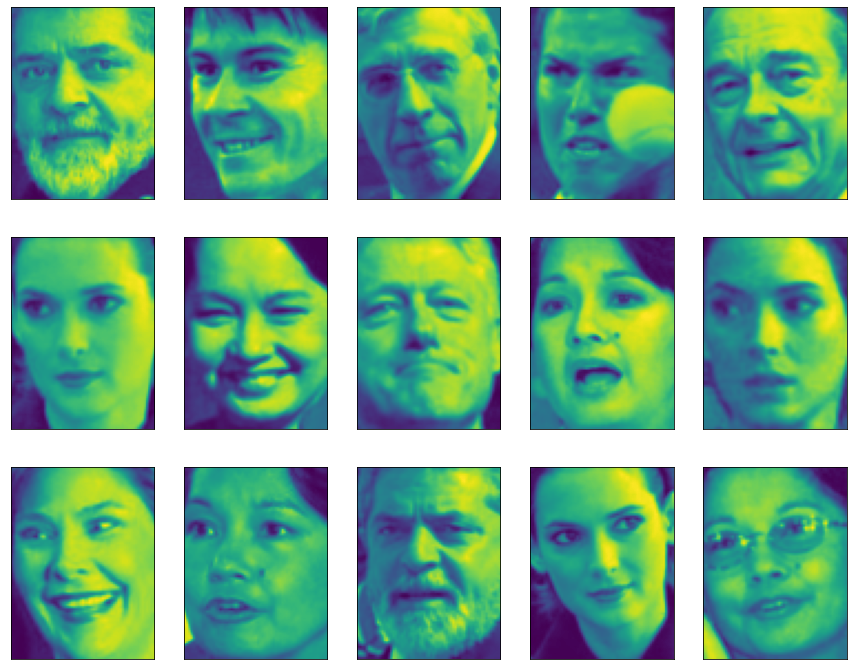

In [54]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw ={'xticks' : (), 'yticks' : ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw ={'xticks' : (), 'yticks' : ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

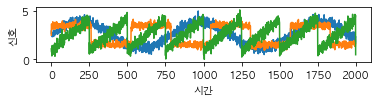

In [55]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel('시간')
plt.ylabel('신호')

In [56]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print('측정 데이터 형태 : ', X.shape)

nnf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nnf.fit_transform(X)
print('복원한 신호 데이터 형태 : ', S_.shape)

측정 데이터 형태 :  (2000, 100)
복원한 신호 데이터 형태 :  (2000, 3)


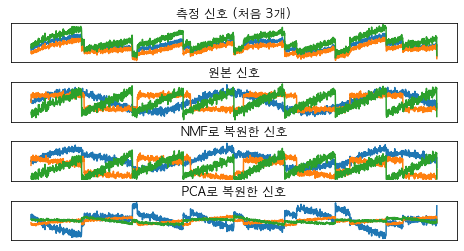

In [57]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)', '원본 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace' : .5}, subplot_kw={'xticks' : (), 'yticks' : ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

#### 3.4.3 t-SNE를 이용한 매니폴드 학습
#### 매니폴드 학습 : 복잡한 매핑을 만들어 더 나은 시각화를 제공 ex. t-SNE / 목적 자체가 시각화 / 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못함 / EDA에서 유용하지만 지도 학습용으로는 거의 사용하지 않음
#### t-SNE : 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것이 주된 아이디어 / 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중 / 이웃 데이터 포인트에 대한 정보를 보존하고자 노력

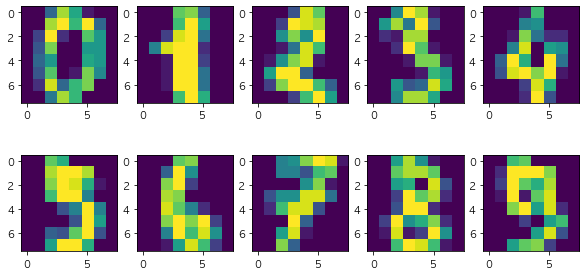

In [58]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10,5))
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

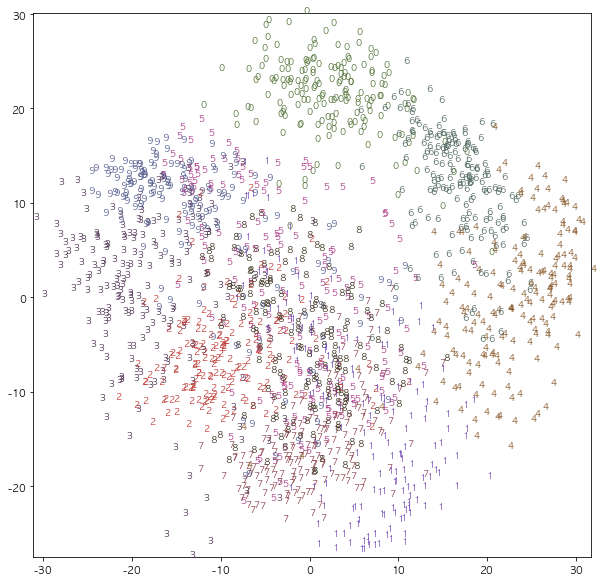

In [63]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#865525', '#A83683',
         '#4E655E', '#853541','#3A3120', '#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight' : 'bold', 'size' : 9})

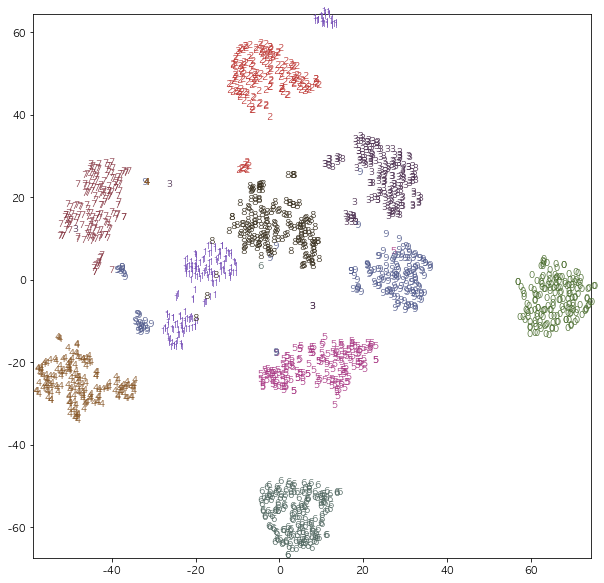

In [64]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight' : 'bold', 'size' : 9})

### 3.5 군집
#### 3.5.1 k-평균 군집
#### 클러스터 중심을 찾음 / 2단계 알고리즘 반복(데이터 포인트를 가장 가까운 클러스터 중심에 할당 -> 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정)

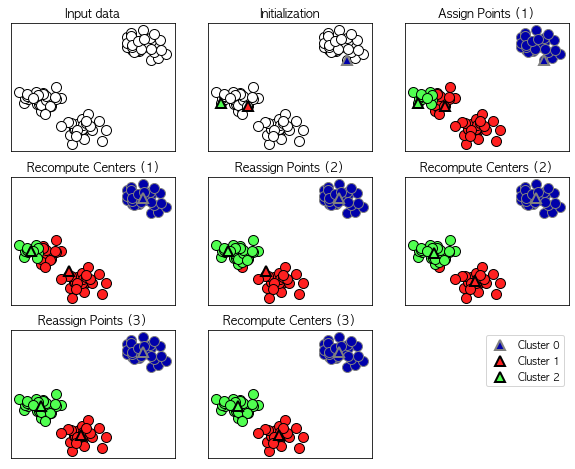

In [65]:
mglearn.plots.plot_kmeans_algorithm()

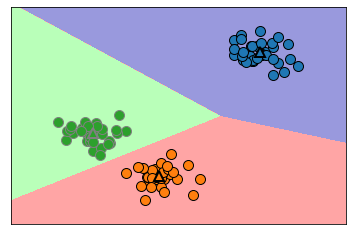

In [66]:
mglearn.plots.plot_kmeans_boundaries()

In [68]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print('클러스터 레이블 : \n {}'.format(kmeans.labels_))
print('-----------------------------------------')
print(kmeans.predict(X))

클러스터 레이블 : 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
-----------------------------------------
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


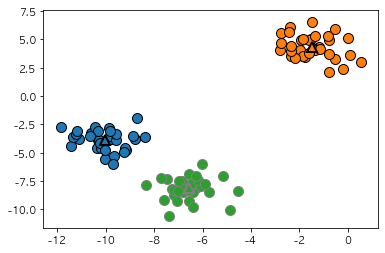

In [69]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0,1,2], markers='^', markeredgewidth=2)

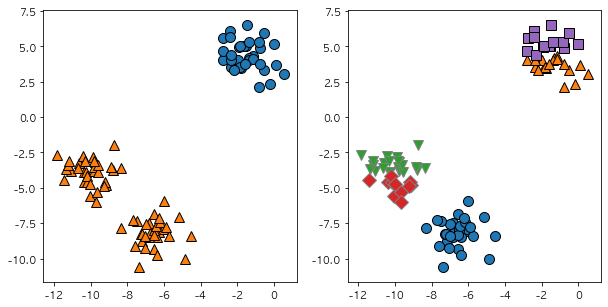

In [70]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

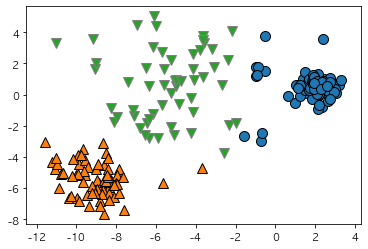

In [72]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

클러스터 레이블 : 
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


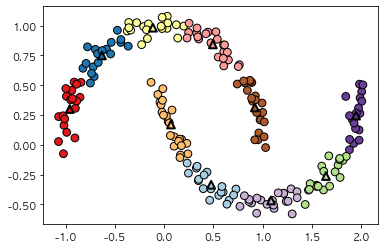

In [73]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=200, noise=.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker='^', c=range(kmeans.n_clusters), linewidths=2, cmap='Paired', edgecolors='black')
print('클러스터 레이블 : \n', y_pred)

In [74]:
distance_feature = kmeans.transform(X)
print('클러스터 거리 데이터의 형태 : \n', distance_feature.shape)
print('클러스터 거리 : \n', distance_feature)

클러스터 거리 데이터의 형태 : 
 (200, 10)
클러스터 거리 : 
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


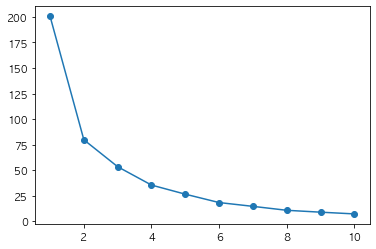

In [75]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.show()

#### 3.5.2 병합 군집
#### 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 특정 종료 조건(ex. 클러스터 개수)을 만족할 떄까지 가장 비슷한 클러스터를 합침

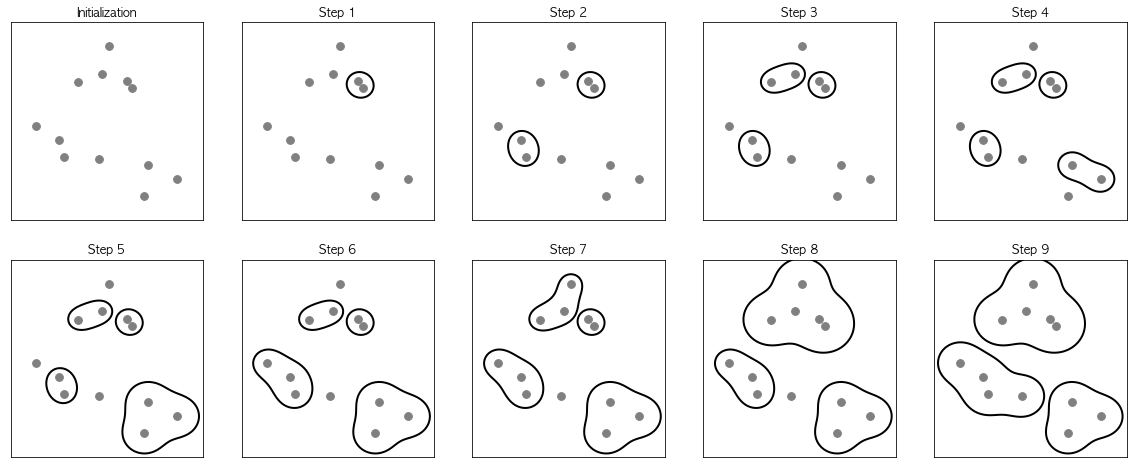

In [76]:
mglearn.plots.plot_agglomerative_algorithm()

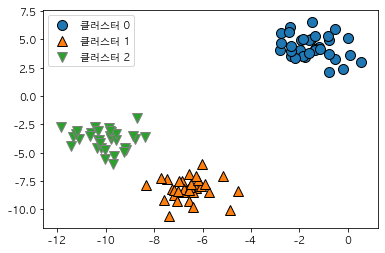

In [78]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc = 'best')

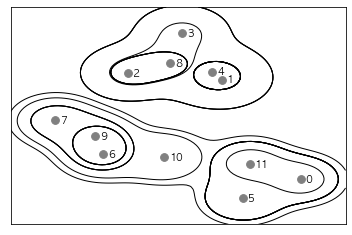

In [79]:
mglearn.plots.plot_agglomerative()

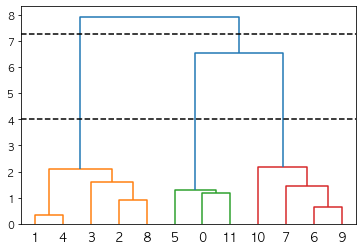

In [80]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples =12)
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')


#### 3.5.3 DBSCAN
#### 클러스터 개수를 미리 정할 필요 없음 / 어떤 클래스에도 속하지 않는 포인트 구분 가능 / 느리지만 큰 데이터셋에도 적용 가능 / 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역(밀집 지역)의 포인트를 찾음
#### 밀집 지역이 한 클러스터를 구성하며 비어있는 지역을 경계로 다른 클러스터와 구분된다는 아이디어로 시작
#### 핵심 샘플 : 밀집 지역에 있는 포인트(중심 느낌)

In [81]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('클러스터 레이블 : \n', clusters)

클러스터 레이블 : 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


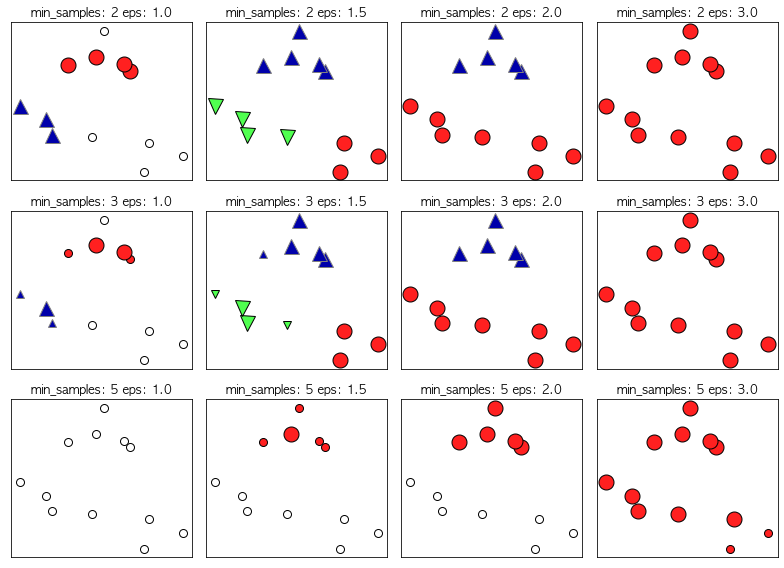

In [82]:
mglearn.plots.plot_dbscan()

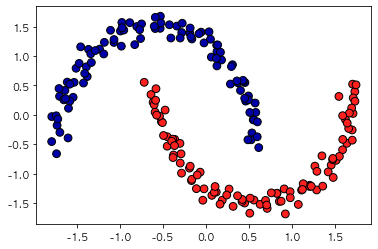

In [85]:
X,y = make_moons(n_samples=200, noise=.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')

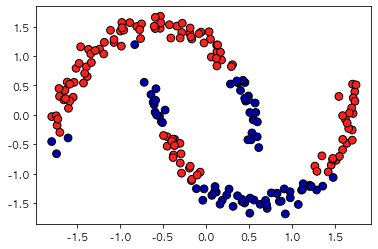

In [86]:
X,y = make_moons(n_samples=200, noise=.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=.2)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')

#### 3.5.4 군집 알고리즘의 비교와 평가
#### ARI(Adjusted Rand Index) / NMI(Normalized Mutual Information) 활용

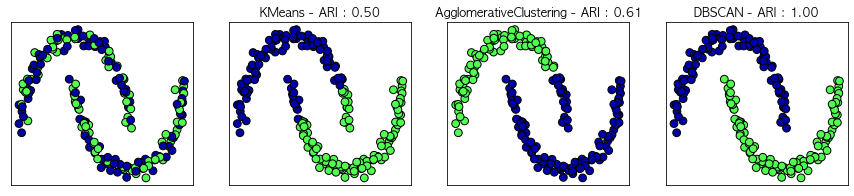

In [87]:
from sklearn.metrics.cluster import adjusted_rand_score
X,y = make_moons(n_samples=200, noise=.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks' : (), 'yticks' : ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolor='black')

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolor='black')
    ax.set_title("{} - ARI : {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

#### 실루엣 계수 : 타깃 값이 필요 없는 군집용 지표 / 실제로 잘 작동하지는 않음 / 클러스터의 밀집 정도를 계산

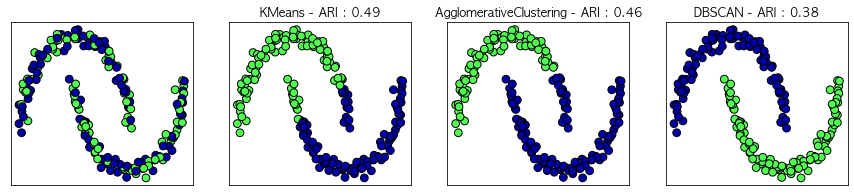

In [90]:
from sklearn.metrics.cluster import silhouette_score
X,y = make_moons(n_samples=200, noise=.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks' : (), 'yticks' : ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolor='black')

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolor='black')
    ax.set_title("{} - ARI : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

#### 군집 알고리즘을 적용하고 평가하는 것은 매우 정성적이며 탐색적 데이터 분석 단계에 크게 도움이 될 수 있음
#### k-평균과 병합 군집은 원하는 클러스터 개수를 지정할 수 있음 / DBSCAN은 eps 매개변수를 활용하여 클러스터 크기를 간접적으로 조절 가능
#### k-평균 : 클러스터 중심을 사용해 클러스터를 구분 / 분해 방법
#### DBSCAN : 클러스터에 할당되지 않는 잡음 포인트를 인식 가능 / 클러스터 개수 자동으로 결정 / 복잡한 클러스터 모양 인식 가능 / 크기가 다른 클러스터 생성 가능
#### 병합 군집 : 전체 데이터의 분할 계층도 생성 / 덴드로그램을 사용해 확인 가능